# Finding the Best Markets to Advertise In

### Scenario

We are working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, and more. We want to promote our product and we'd like to invest some money in advertisement.

### Goal

Our goal is to find out the two best markets to advertise our product in.

### Result

We determined that Data Science and Game Development are our two best markets, targeting students in high school and college as well as professionals between their 20s and 40s. Advertising efforts are most effective if deployed in North America, namely California, Texas, New York, and Florida. Content strategies should be career-oriented as the learners plan to either start their first career or change careers.

Aspiring data scientists front a higher investment from their own pockets for their education. The learners have more years of experience on average, providing them with the income to sustain their learning cost. They also typically invest more hours per week learning. These learners tend to have a bachelor's degree or master's degree.

Aspiring game developers graduated high school or have some college experience. The average cost and age are lower for game development which would attract more learners due to its affordability and, if highly accessible, may lead to higher enrollment. The number of aspiring game developers is close to that of aspiring data scientists, attributing to their popularity. 

Listed below is a summary of the best two markets.

| Career Interest | Data Scientist | Game Developer |
| :-- | :-- | :-- | 
| Geographic Locations | North America, Europe and Central Asia, South Asia | North America, Europe and Central Asia, Southeast Asia |
| US States | California, Texas, New York | Texas, California, Florida |
| Learning Motivation | To change careers | To start first career |
| Average Age | 31 | 24 |
| Average Income (US Dollars) | 52,000 | 28,800 |
| Race | White, Hispanio/Latino, Black/African American | White, Hispanio/Latino, Black/African American |
| Education Obtained | Bachelor's or Master's degree | High school diploma or some college |
| Developer Experience | 14.29 months | 8.09 months |
| Learning per Week | 9.48 hours | 8.14 hours |
| Average Learning Investment | $665.63 | $300.72 |

# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
from natsort import natsorted

warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_theme(style="whitegrid")
plt.rcParams["font.family"] = "arial"

# Import the data

To reach our goal, we search existing data that might be relevant for our purpose. The dataset we will use is from [freeCodeCamp's 2021 New Coder Survey](https://github.com/freeCodeCamp/2021-new-coder-survey). freeCodeCamp sends out the survey annually. As of August 6, 2023, 2021 is the most recent year for which they have provided this survey data.

In [2]:
df = pd.read_csv("2021 New Coder Survey.csv")

# Explore the data

## What does the data look like?

In [3]:
df.head()

,Timestamp,1. What is your biggest reason for learning to code?,2. What methods have you used to learn about coding? Please select all that apply.,3. Which online learning resources have you found helpful? Please select all that apply.,"4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.","5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.","6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.",7. About how many hours do you spend learning each week?,8. About how many months have you been programming?,"9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?",...,45. Please tell us how satisfied you are with each of these following aspects of your present job [Job security],45. Please tell us how satisfied you are with each of these following aspects of your present job [Work-life balance],45. Please tell us how satisfied you are with each of these following aspects of your present job [Professional growth or leadership opportunities],45. Please tell us how satisfied you are with each of these following aspects of your present job [Workplace/company culture],45. Please tell us how satisfied you are with each of these following aspects of your present job [Diverse and inclusive work environment],45. Please tell us how satisfied you are with each of these following aspects of your present job [Weekly workload],46. About how many minutes does it take you to get to work each day?,47. Have you served in your country's military before?,48. Do you currently receive disability benefits from your government?,49. Do you have high speed internet at your home?
0,7/1/2021 10:10:23,To succeed in current career,"Online resources, Books, In-person bootcamps, ...","freeCodeCamp, Mozilla Developer Network (MDN),...","conferences, workshops, Meetup.com events",The Changelog,"CS Dojo, freeCodeCamp",4.0,120,NaN,...,Somewhat satisfied,Somewhat dissatisfied,I do not know,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,I work from home,No,No,Yes
1,7/1/2021 10:31:01,To change careers,"Online resources, Books, Online bootcamps","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"The Changelog, Code Newbie Podcast","Adrian Twarog, Code with Ania Kubów, Coder Cod...",10.0,6,30,...,Very dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,15 to 29 minutes,No,Yes,Yes
2,7/1/2021 10:42:31,To change careers,"Online resources, Books, Hackathons, Meetup.co...","freeCodeCamp, Mozilla Developer Network (MDN),...",Meetup.com events,I haven't listened to any podcasts,"AmigosCode, Dev Ed, freeCodeCamp, Kevin Powell...",30.0,48,300,...,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,I am not working,No,No,Yes
3,7/1/2021 11:06:43,As a hobby,"Online resources, Books","freeCodeCamp, Mozilla Developer Network (MDN),...",I haven't attended any in-person coding-relate...,"Darknet Diaries, Real Python Podcast","freeCodeCamp, Traversy Media",NaN,36,0,...,NaN,NaN,NaN,NaN,NaN,NaN,I am not working,No,No,No
4,7/1/2021 11:14:31,To start your first career,"Online resources, Books, Online bootcamps","freeCodeCamp, Stack Overflow, Coursera, Udemy",I haven't attended any in-person coding-relate...,Talk Python to Me,"freeCodeCamp, The Net Ninja, Traversy Media",2.0,24,5000,...,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat dissatisfied,45 to 60 minutes,No,No,Yes


In [4]:
df.shape

(18126, 63)

There are 18,126 rows and 63 columns.

We see how comprehensive the survey is with 63 questions. 

In [5]:
for column in df.columns:
    print(column)

Timestamp
1. What is your biggest reason for learning to code?
2. What methods have you used to learn about coding? Please select all that apply.
3. Which online learning resources have you found helpful? Please select all that apply.
4. If you have attended in-person coding-related events before, which ones have you found helpful? Please select all that apply.
5. If you have listened to coding-related podcasts before, which ones have you found helpful? Please select all that apply.
6. If you have watched coding-related YouTube videos before, which channels have you found helpful? Please select all that apply.
7. About how many hours do you spend learning each week?
8. About how many months have you been programming?
9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?
10. Are you already employed in a software development job?
11. If you are already employed as a developer, is this your first software development job? 
12. I

We instantiate the column header strings into shorter variables to recall them more easily. From the list of columns, we pick the following to explore and frame our analysis.

In [6]:
learning_motivation = "1. What is your biggest reason for learning to code?"
career_interests = "14. Which of these careers are you interested in?"
weekly_learning_hours = "7. About how many hours do you spend learning each week?"
months_of_experience = "8. About how many months have you been programming?"
learning_cost = "9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?"
income = "22. About how much money did you earn last year from any job or employment (in US Dollars)? "
age = "23. How old are you?"
race = "25. With which of these groups do you primarily identify?"
location = "26. Which part of the world do you live in?"
state = "27. If you are living in the US, which state do you currently live in? "
highest_education = "32. What is the highest degree or level of school you have completed?"

# Analyze the data

## What careers are most learners interested in?

Recall our e-learning company offers web and mobile development courses but also from a few other domains as well. An insight into other course topics with high interest could help narrow the search for the best markets to advertise our product in.

In [7]:
df[career_interests].value_counts(normalize=True).head(10)

14. Which of these careers are you interested in?
Full-Stack Web Developer                                0.331167
Front-End Web Developer                                 0.118631
Data Scientist                                          0.114721
Game Developer                                          0.080506
Back-End Web Developer                                  0.051466
Information Security                                    0.049684
I am not interested in a software development career    0.037895
Mobile Developer                                        0.036975
Data Engineer                                           0.027660
DevOps / SysAdmin                                       0.022944
Name: proportion, dtype: float64

From the chart below, we confirm more readily that our respondents' interests are aligned with the majority of our course offerings in web and mobile development. Web development is the leading career interest with full-stack, front-end, and back-end all in the top five. Mobile development lands at #8.

Other popular career interests in the top 10 are Data Scientist (#3), Game Developer (#4), Information Security (#6), Data Engineer (#9), and DevOps/SysAdmin (#10). These are the career domains we explore in more detail to determine which two will be most profitable.

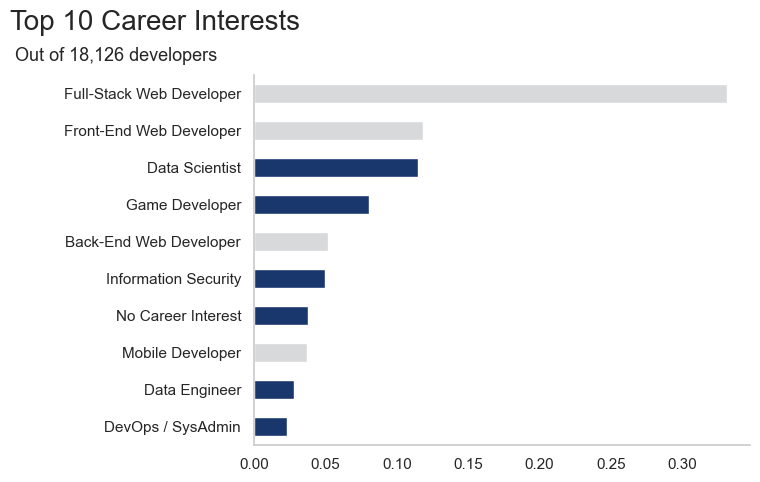

In [8]:
prospects = ["Data Scientist", "Game Developer", "Information Security", "No Career Interest", "Data Engineer", "DevOps / SysAdmin"]
df[career_interests] = df[career_interests].replace("I am not interested in a software development career", "No Career Interest")
top_10 = df[career_interests].value_counts(normalize=True).head(10)
light = "#D8D9DA" # gray
dark = "#19376D" # blue

ax = top_10.plot.barh(color=[dark if career in prospects else light for career in top_10.index])
plt.title("Top 10 Career Interests", fontsize=20, x=-0.2, y=1.10)
plt.suptitle(f"Out of {len(df):,} developers", fontsize=13, x=-0.09, y=0.94)
ax.invert_yaxis()
plt.ylabel("")
plt.grid(False)
sns.despine()

Data science and game development look promising but the chart doesn't tell the full story. 

It makes sense that most respondents are interested in becoming web and mobile developers as the majority of the courses we offer teach those subjects. That same logic can be applied to data science and game development. We simply might be offering more courses on those two topics rather than on data engineering and DevOps/SysAdmin which attracts particular learners.

We can get more information exploring demographics and from the financial questions that tell us income and average learning cost by career interest.

## How much are people willing to pay?

First, we create a new dataset to include only the five career interests in question.

In [9]:
df_new = df[df[career_interests].isin(prospects)].copy()

In [10]:
counts = df_new[career_interests].value_counts()
print(counts)

14. Which of these careers are you interested in?
Data Scientist          1995
Game Developer          1400
Information Security     864
No Career Interest       659
Data Engineer            481
DevOps / SysAdmin        399
Name: count, dtype: int64


In [11]:
df_new[learning_cost].fillna(0, inplace=True)
df_new[learning_cost] = df_new[learning_cost].astype(float)

average_costs = []
total_costs = []
for prospect, count in zip(prospects, counts):
    average_cost = df_new[df_new[career_interests]==prospect][learning_cost].mean()
    average_costs.append(average_cost)
    total_cost = round(average_cost * count)
    total_costs.append(total_cost)
    print(f"{prospect}: ${total_cost:,}, averaging ${average_cost:.2f} per person")

Data Scientist: $947,208, averaging $474.79 per person
Game Developer: $259,031, averaging $185.02 per person
Information Security: $242,924, averaging $281.16 per person
No Career Interest: $75,428, averaging $114.46 per person
Data Engineer: $133,700, averaging $277.96 per person
DevOps / SysAdmin: $162,457, averaging $407.16 per person


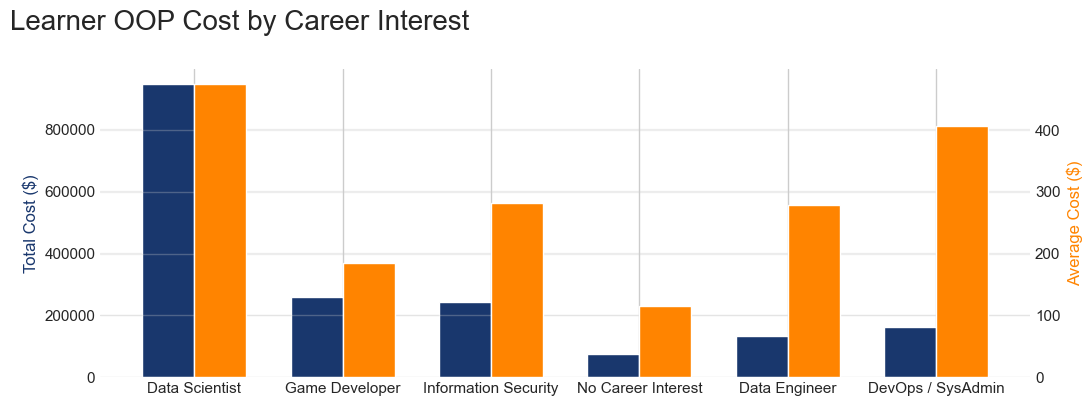

In [12]:
bar_width = 0.35
x_pos = np.arange(len(prospects))
color1 = "#19376D"
color2 = "#FF8400"

fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.bar(x_pos, total_costs, width=bar_width, label='Total Cost', color=color1)
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, average_costs, width=bar_width, label='Average Cost', color=color2)

ax1.set_ylabel("Total Cost ($)", color=color1)
ax2.set_ylabel("Average Cost ($)", color=color2)
ax1.grid(axis="y", alpha=0.3)
ax2.grid(axis="y", alpha=0.3)
ax1.tick_params(axis="both", length=0)
ax2.tick_params(axis="both", length=0)

plt.xticks(x_pos + bar_width / 2, prospects)
plt.title("Learner OOP Cost by Career Interest", fontsize=20, x=0.15, y=1.10)
sns.despine(top=True, bottom=True, left=True, right=True)


Learners interested in becoming data scientists have invested an average of $475 on their education using funds not from university tuition. Collectively, they have spent more on their education than those interested in the other four careers. This is the best market to strategically advertise with. 

Aspiring game developers spent less out-of-pocket (OOP) than the other career interests. It is possible that the education cost or average income is lower. The lower cost may attract more learners to game development due to its affordability.

On the other hand, InfoSec, Data Engineering, and DevOps/SysAdmin have either more expensive education or learners who are able to invest more in their education. 

Those not interested in a software development career doesn't appear to be a profitable market so we rule them out. We create a new DataFrame with the top five career interests.

In [13]:
top5_markets = ["Data Scientist", "Game Developer", "Information Security", "Data Engineer", "DevOps / SysAdmin"]
df_top5 = df_new[df_new[career_interests].isin(top5_markets)]

## What motivates learners to code?

For each of the top five career interests, we want to understand what drives learners to code.

In [14]:
top5_motivations = df_top5["1. What is your biggest reason for learning to code?"].value_counts().head()
top5_motivations

1. What is your biggest reason for learning to code?
To start your first career             1423
To change careers                      1262
As a hobby                              686
To succeed in current career            630
To start a business or to freelance     584
Name: count, dtype: int64

Most learners are career-driven in their learning journey and want to start, change, or succeed in their career.

In [15]:
pivot_table = df_top5.pivot_table(index=learning_motivation, columns=career_interests, aggfunc="size")
filtered_pivot_table = pivot_table[pivot_table.index.isin(top5_motivations.index)]

Text(0.17, 1.1, 'Learning Motivation Distribution by Career Interest')

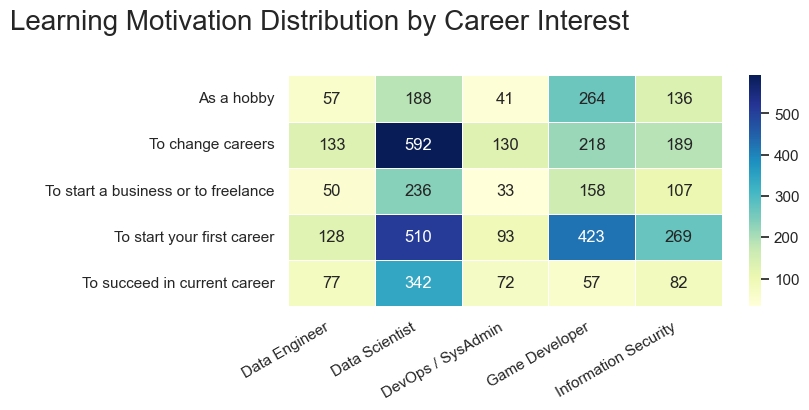

In [16]:
plt.figure(figsize=(7,3))
sns.heatmap(filtered_pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.xticks(rotation=30, ha="right")
plt.xlabel("")
plt.ylabel("")
plt.suptitle("Learning Motivation Distribution by Career Interest", fontsize=20, x=.17, y=1.1)

For aspiring data scientists, their learning objective is career-oriented as many are looking to start a new career or change their existing career. They also want to succeed in their existing career as a data scientist. It is reasonable to assume most aspiring data scientists have more years of experience and are possibly older in age.

Those interested in game development and InfoSec are largely looking to get their feet wet and start their first career. However, learners for game development primarily aim to start their career whereas InfoSec learners have a more flattened split in their aspirations. We will need to explore trade-offs as arguments can be made for both as a second market.

Going forward, we narrow down our picks to (1) Data Scientist and (2) Game Developer or InfoSec.

In [17]:
top3_markets = ["Data Scientist", "Game Developer", "Information Security"]
df_top3 = df_top5[df_top5[career_interests].isin(top3_markets)]

# What do the demographics of potential markets look like?

## Geographic Location

To build advertising strategies, we want to know in what parts of the world to effectively deploy.

Data Scientist:
26. Which part of the world do you live in?
North America                  479
Europe and Central Asia        327
South Asia                     324
Latin America and Caribbean    300
Southeast Asia                 203
Name: count, dtype: int64
------------------------------
Game Developer:
26. Which part of the world do you live in?
North America                  473
Europe and Central Asia        260
Southeast Asia                 156
Latin America and Caribbean    155
South Asia                     120
Name: count, dtype: int64
------------------------------
Information Security:
26. Which part of the world do you live in?
North America                  305
Europe and Central Asia        130
South Asia                      90
Latin America and Caribbean     86
Southeast Asia                  74
Name: count, dtype: int64
------------------------------


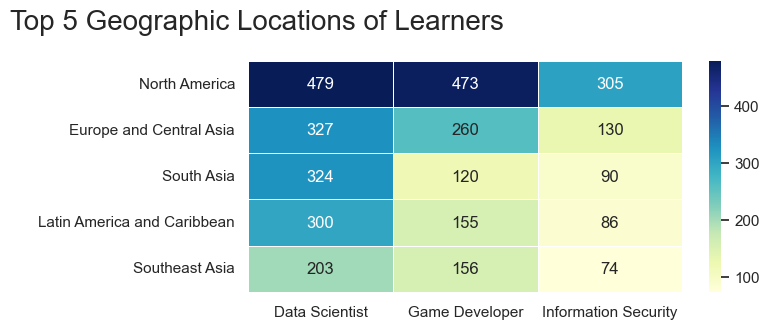

In [18]:
df_geo_heatmap = pd.DataFrame()
for interest in top3_markets:
    count_by_region = df_top3[df_top3[career_interests] == interest][location].value_counts().head()
    print(f"{interest}:")
    print(count_by_region)
    print(f"{'-'*30}")
    df_geo_heatmap[interest] = count_by_region
plt.figure(figsize=(7, 3))
sns.heatmap(data=df_geo_heatmap, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Top 5 Geographic Locations of Learners", fontsize=20, x=0.02, y=1.1)
plt.xlabel("")
plt.ylabel("")
plt.show()

The countries rank nearly the same in descending order of developer count. Most live in North America, Europe, and Central Asia. Because we want to advertise in the biggest markets, we focus on the top regions based on aspiring data scientists.

Note that apart from North America, the global interest in data science is distributed almost equally in the top five regions. For game development and InfoSec, the interest is concentrated mostly in North America, Europe and Central Asia.

In [19]:
for interest in top3_markets:
    count_by_state = df_top3[(df_top3[career_interests] == interest) & (df_top3[location] == "North America")][state].value_counts().head(4)
    print(f"{interest}:")
    print(count_by_state)
    print(f"{'-'*30}")

Data Scientist:
27. If you are living in the US, which state do you currently live in? 
California                   54
I am not living in the US    48
Texas                        38
New York                     23
Name: count, dtype: int64
------------------------------
Game Developer:
27. If you are living in the US, which state do you currently live in? 
I am not living in the US    47
Texas                        44
California                   36
Florida                      34
Name: count, dtype: int64
------------------------------
Information Security:
27. If you are living in the US, which state do you currently live in? 
California                   34
Florida                      26
New York                     23
I am not living in the US    20
Name: count, dtype: int64
------------------------------


Most learners in the U.S. live in California, Texas, New York, and Florida.

We narrow down our dataset to North America only as the geographical starting point of our future advertising efforts.

In [20]:
df_top = df_top3[df_top3[location] == "North America"]

## Learning Motivation

Text(0.14, 1.05, 'Top Learning Motivations by Career Interest')

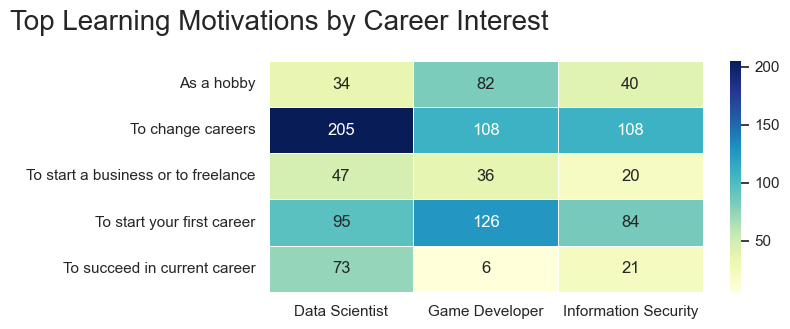

In [21]:
top_motivations = df_top[learning_motivation].value_counts().head()
pivot_table = df_top.pivot_table(index=learning_motivation, columns=career_interests, aggfunc="size")
filtered_pivot_table = pivot_table[pivot_table.index.isin(top_motivations.index)]
filtered_pivot_table

plt.figure(figsize=(7,3))
sns.heatmap(filtered_pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.xticks()
plt.xlabel("")
plt.ylabel("")
plt.suptitle("Top Learning Motivations by Career Interest", fontsize=20, x=.14, y=1.05)

Aspiring learners want to either change careers or start their first career.

## Age

In [22]:
df_age = df_top[df_top[age] < 90]
df_age.groupby(career_interests).agg({age: pd.Series.mean}).round()

,23. How old are you?
14. Which of these careers are you interested in?,
Data Scientist,31.0
Game Developer,24.0
Information Security,31.0


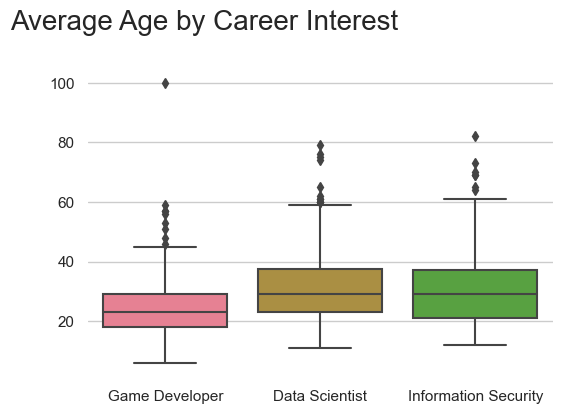

In [23]:
sns.set_palette("husl")
plt.figure(figsize=(6,4))
sns.boxplot(data=df_top, x=career_interests, y=age)
plt.xlabel("")
plt.ylabel("")
sns.despine()
plt.title("Average Age by Career Interest", fontsize=20, x=.25, y=1.1)
sns.despine(top=True, bottom=True, left=True, right=True)

As expected, aspiring game developers on average are younger at age 24. Removing the far outlier of `100` for Game Developer did not decrease the average so we kept it in. The age distributions for InfoSec and Data Scientist are the same at age 31.

## Race

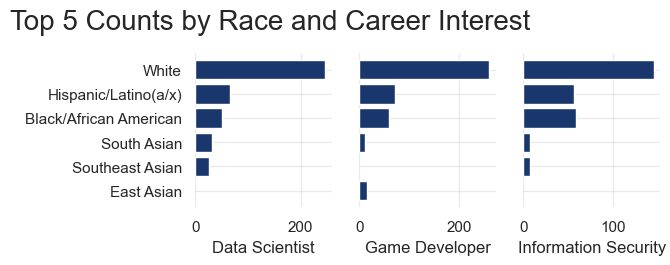

In [24]:
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(6,2), sharey=True)
unique_race_values = natsorted(df_top[race].astype(str).unique())

for index, interest in enumerate(top3_markets):
    race_counts = df_top[df_top[career_interests]==interest][race].value_counts().head()

    axes[index].barh(race_counts.index, race_counts.values, color="#19376D")
    axes[index].set_xlabel(interest)
    axes[index].invert_yaxis()
    axes[index].grid(alpha=0.4)
    
plt.suptitle("Top 5 Counts by Race and Career Interest", fontsize=20, x=0.25, y=1.1)
sns.despine(top=True, bottom=True, left=True, right=True)

Learners in the U.S. interested in data science, game development, or InfoSec are predominantly white. 

## Education

In [25]:
for interest in top3_markets:
    edu_counts = df_top[df_top[career_interests]==interest][highest_education].value_counts(normalize=True).head()
    print(edu_counts)

32. What is the highest degree or level of school you have completed?
Bachelor’s degree                          0.410901
Some college credit, no degree             0.169811
Master's degree (non-professional)         0.134172
High school diploma or equivalent (GED)    0.062893
Professional degree (MBA, MD, JD, etc.)    0.056604
Name: proportion, dtype: float64
32. What is the highest degree or level of school you have completed?
Some college credit, no degree             0.241830
High school diploma or equivalent (GED)    0.196078
Bachelor’s degree                          0.165577
Some high school                           0.161220
No high school (secondary school)          0.084967
Name: proportion, dtype: float64
32. What is the highest degree or level of school you have completed?
Some college credit, no degree             0.259136
Bachelor’s degree                          0.252492
High school diploma or equivalent (GED)    0.166113
Associate’s degree                         0.083

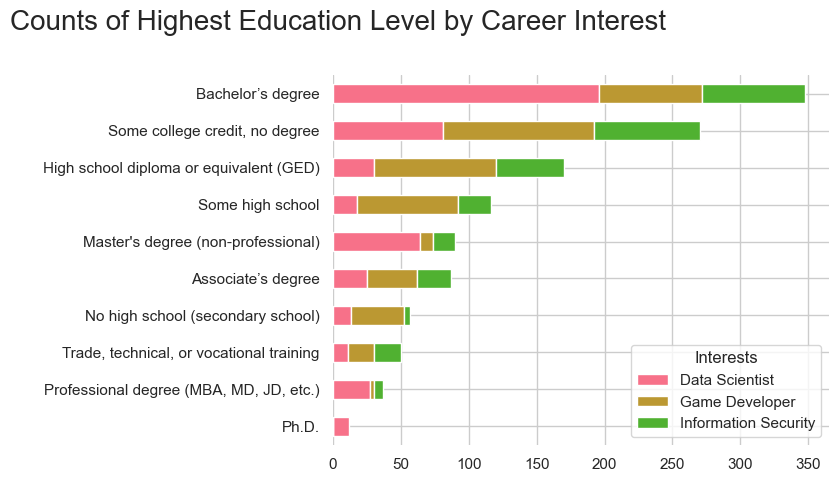

In [26]:
stacked_data = pd.DataFrame()

for interest in top3_markets:
    df_education = df_top[(df_top[career_interests] == interest) & (df_top[highest_education] != 'nan')]
    edu_counts = df_education[highest_education].value_counts()
    stacked_data[interest] = edu_counts

total_counts = stacked_data.sum(axis=1)
sorted_levels = total_counts.sort_values(ascending=False).index
stacked_data = stacked_data.loc[sorted_levels]
stacked_data.plot.barh(stacked=True)

plt.legend(title='Interests')
plt.xlabel("")
plt.ylabel("")
plt.title("Counts of Highest Education Level by Career Interest", fontsize=20, x=0.01, y=1.1)
sns.despine(top=True, bottom=True, left=True, right=True)
plt.gca().invert_yaxis()

Most learners have at least high school experience. 

Those interested in data science tend to have college degrees such as bachelor's, master's, professional, and Ph.Ds compared to the other domains. 40% of aspiring data scientists have a bachelor's degree. This is reasonable as data science jobs typically request a master's degree or higher. 

Those seeking game development and InfoSec are mostly in high school and college. Formal education is not emphasized in these domains. Game development is typically self-study. For InfoSec in particular, certifications are highly valued and don't require a college degree.

## Income

In [27]:
df_top[income] = df_top[income].str.replace("$","").str.replace(",", "").str.replace("to", " - ")
df_top[income] = df_top[income].str.replace("Under 1000", "0 - 1000").str.replace("I don’t know", "nan").str.replace("I don't want  -  answer", "nan")

Average income of Data Scientist learners: $52,006
Average income of Game Developer learners: $28,796
Average income of Information Security learners: $41,855


Text(0, 0.5, 'Income ($)')

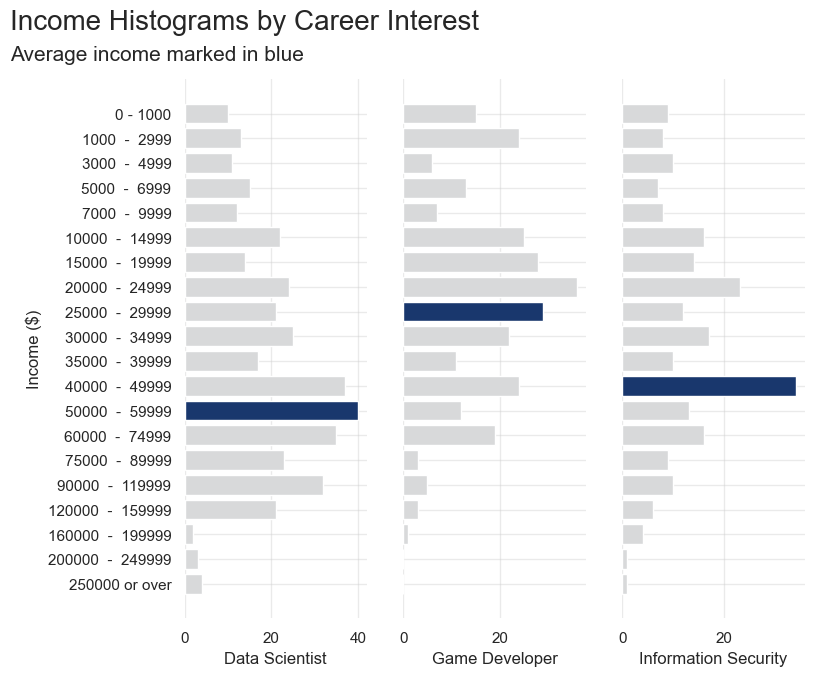

In [28]:
fig, axes= plt.subplots(nrows=1, ncols=3, figsize=(8,7), sharey=True)
unique_income_values = natsorted(df_top[income].astype(str).unique())
c1 = "#D8D9DA"
c2 = "#19376D"

colors=[
        [c1,c1,c1,c1,c1,c1,c1,c1,c1,c1,c1,c1,c2,c1,c1,c1,c1,c1,c1,c1],
        [c1,c1,c1,c1,c1,c1,c1,c1,c2,c1,c1,c1,c1,c1,c1,c1,c1,c1,c1,c1],
        [c1,c1,c1,c1,c1,c1,c1,c1,c1,c1,c1,c2,c1,c1,c1,c1,c1,c1,c1,c1]
        ]
for index, interest in enumerate(top3_markets):
    income_counts = df_top[df_top[career_interests]==interest][income].value_counts()
    income_counts = income_counts.reindex(unique_income_values, fill_value=0)
    income_counts = income_counts.drop("nan")

    income_midpoints = []
    for value in unique_income_values:
        if value == "nan":
            income_midpoint = 0
        elif value == "250000 or over":
            income_midpoint = 250000
        else:
            income_midpoint = (float(value.split(" - ")[0])+float(value.split(" - ")[1]))/2
        income_midpoints.append(income_midpoint)

    income_midpoints = sorted(income_midpoints[:-1])

    avg_income = np.dot(income_midpoints, income_counts)/income_counts.sum()  
    print(f"Average income of {interest} learners: ${round(avg_income):,}")

    axes[index].barh(income_counts.index, income_counts.values, color=colors[index])
    axes[index].set_xlabel(interest)
    axes[index].invert_yaxis()
    axes[index].grid(alpha=0.4)
    
plt.suptitle("Income Histograms by Career Interest", fontsize=20, x=0.2)
plt.title("Average income marked in blue", x=-2.55, y=1.02, fontsize=15)
sns.despine(top=True, bottom=True, left=True, right=True)
axes[0].set_ylabel("Income ($)")

Aspiring game developers are younger by 7 years on average and have a lower average income than the other two career interests. As we noted a sizeable population learn as a hobby and the majority aim to start their first career, it makes sense that many of the learners are unemployed or work part-time.

## Developer Experience vs. Learning Hours

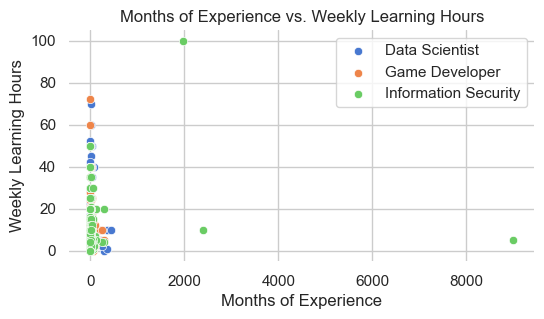

In [29]:
df_filtered = df_top[df_top[career_interests].isin(top3_markets)]
df_filtered[weekly_learning_hours] = pd.to_numeric(df_filtered[weekly_learning_hours], errors="coerce")
df_filtered[months_of_experience] = pd.to_numeric(df_filtered[months_of_experience], errors="coerce")
df_filtered = df_filtered.dropna(subset=[weekly_learning_hours, months_of_experience])

sns.set_palette("muted")
plt.figure(figsize=(6,3))
for interest in top3_markets:
    sns.scatterplot(x=months_of_experience, y=weekly_learning_hours, data=df_filtered[df_filtered[career_interests] == interest], label=interest)

plt.xlabel("Months of Experience")
plt.ylabel("Weekly Learning Hours")
plt.title("Months of Experience vs. Weekly Learning Hours")
sns.despine(top=True, bottom=True, left=True, right=True)
plt.legend()

There are a few outliers. These appear to come from seasoned developers interested in InfoSec or are erroneous (8,000+ months of experience is not humanly possible). Also, 100+ hours learning per week is not sustainable for the average developer.

We zoom in to the plot and analyze the data points again.

Text(0.185, 1.1, 'For learners with up to 48 months of experience')

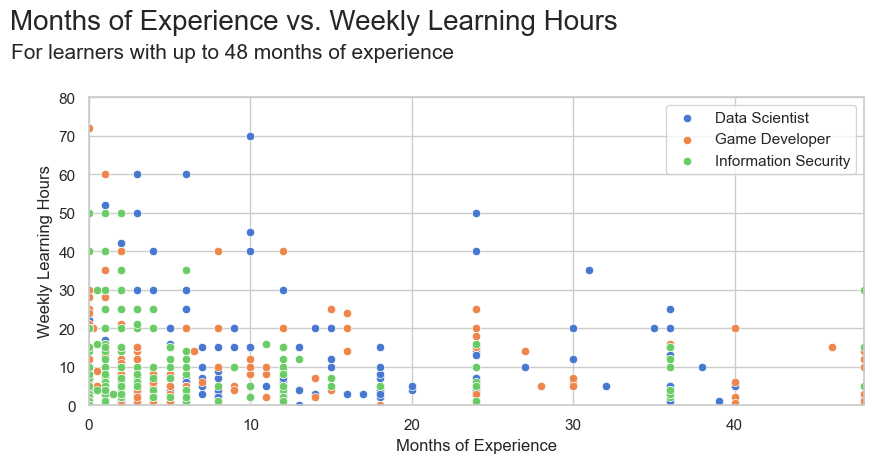

In [30]:
plt.figure(figsize=(10,4))
for interest in top3_markets:
    sns.scatterplot(x=months_of_experience, y=weekly_learning_hours, data=df_filtered[df_filtered[career_interests] == interest], label=interest)
plt.xlim(0,48)
plt.ylim(0, 80)
plt.xlabel("Months of Experience")
plt.ylabel("Weekly Learning Hours")
plt.legend()
plt.suptitle("Months of Experience vs. Weekly Learning Hours", fontsize=20, x=0.35, y=1.1)
plt.title("For learners with up to 48 months of experience", fontsize=15, x=0.185, y=1.1)

It appears that those who have been learning to code for almost two years have more free time to learn per week. Many appear to invest up to 20 hours per week. Aspiring data scientists commit more hours to learning than the other two.

Text(0.14, 1.1, 'For learners with 4+ years of experience')

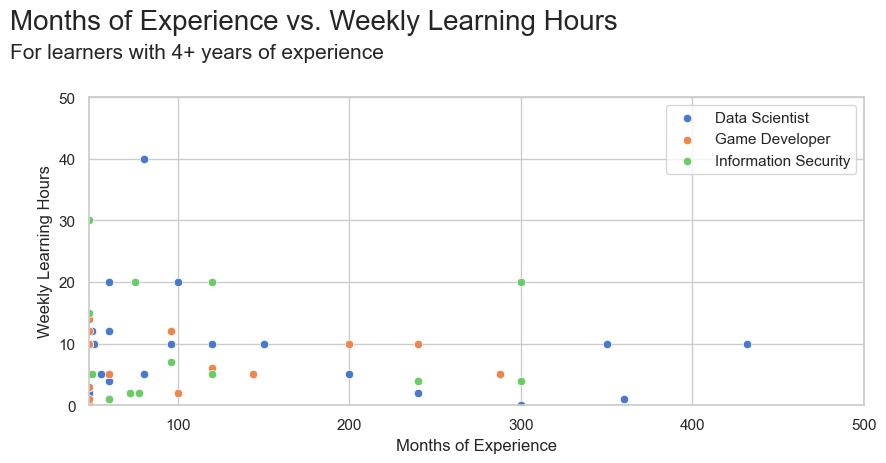

In [31]:
plt.figure(figsize=(10,4))
for interest in top3_markets:
    sns.scatterplot(x=months_of_experience, y=weekly_learning_hours, data=df_filtered[df_filtered[career_interests] == interest], label=interest)
plt.xlim(48,500)
plt.ylim(0, 50)
plt.xlabel("Months of Experience")
plt.ylabel("Weekly Learning Hours")
plt.legend()
plt.suptitle("Months of Experience vs. Weekly Learning Hours", fontsize=20, x=0.35, y=1.1)
plt.title("For learners with 4+ years of experience", fontsize=15, x=0.14, y=1.1)

Learners who have had 30 years of experience or more are aspiring data scientists.

In [32]:
df_top[months_of_experience]=df_top[months_of_experience].astype(float)
df_top = df_top[df_top[months_of_experience] < 500.0]
df_top.groupby(career_interests)[months_of_experience].mean(numeric_only=True)

14. Which of these careers are you interested in?
Data Scientist          14.288462
Game Developer           8.090045
Information Security     9.855634
Name: 8. About how many months have you been programming?, dtype: float64

In [33]:
df_top = df_top[df_top[weekly_learning_hours] <= 80]
df_top.groupby(career_interests)[weekly_learning_hours].mean()

14. Which of these careers are you interested in?
Data Scientist          9.484041
Game Developer          8.144676
Information Security    8.043011
Name: 7. About how many hours do you spend learning each week?, dtype: float64

## Cost of Learning

14. Which of these careers are you interested in?
Data Scientist          438
Game Developer          432
Information Security    279
Name: count, dtype: int64
Data Scientist: $291,547.0, averaging $665.63 per person
Game Developer: $129,911.0, averaging $300.72 per person
Information Security: $48,533.0, averaging $173.95 per person


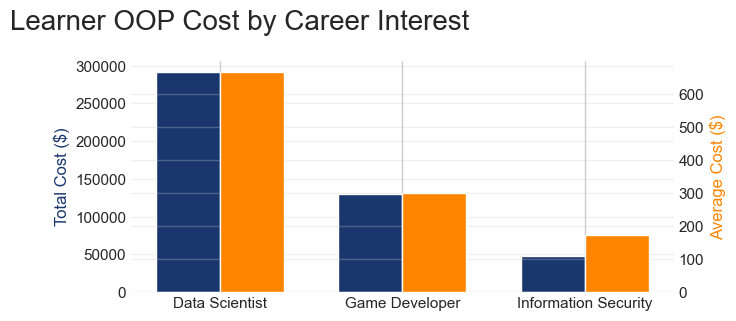

In [34]:
counts = df_top[career_interests].value_counts()
print(counts)
df_top[learning_cost].fillna(0, inplace=True)
df_top[learning_cost] = df_top[learning_cost].astype(int)

average_costs = []
total_costs = []
for interest, count in zip(top3_markets, counts):
    average_cost = df_top[df_top[career_interests]==interest][learning_cost].mean()
    average_costs.append(average_cost)
    total_cost = round(average_cost * count,1)
    total_costs.append(total_cost)
    print(f"{interest}: ${total_cost:,}, averaging ${average_cost:.2f} per person")
    bar_width = 0.35
    
x_pos = np.arange(len(top3_markets))
color1 = "#19376D" # blue
color2 = "#FF8400" # orange

fig, ax1 = plt.subplots(figsize=(7, 3))
ax1.bar(x_pos, total_costs, width=bar_width, label='Total Cost', color=color1)
ax2 = ax1.twinx()
ax2.bar(x_pos + bar_width, average_costs, width=bar_width, label='Average Cost', color=color2)

ax1.set_ylabel("Total Cost ($)", color=color1)
ax2.set_ylabel("Average Cost ($)", color=color2)
ax1.grid(axis="y", alpha=0.3)
ax2.grid(axis="y", alpha=0.3)
ax1.tick_params(axis="both", length=0)
ax2.tick_params(axis="both", length=0)

plt.xticks(x_pos + bar_width / 2, top3_markets)
plt.title("Learner OOP Cost by Career Interest", fontsize=20, x=0.2, y=1.10)
sns.despine(top=True, bottom=True, left=True, right=True)

Aside from web and mobile developers, most learners in North America aspire to become data scientists, followed by game developers and InfoSec. Aspiring data scientists invest the most out-of-pocket costs for their learning while aspiring InfoSec spend the least. Game development has the second highest total cost. As the number of learners and average cost are both high, it may be most profitable to attract aspiring data scientists and game developers.